In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_csv = "/content/drive/MyDrive/TUGAS/Training_set.csv"
test_csv = "/content/drive/MyDrive/TUGAS/Testing_set.csv"
train_dir = "/content/drive/MyDrive/TUGAS/train"
test_dir = "/content/drive/MyDrive/TUGAS/test"

In [ ]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [ ]:
train_df = pd.read_csv(train_csv)
train_df["filename"] = train_df["filename"].apply(lambda x: os.path.join(train_dir, x))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation dan Preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filename",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)
val_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filename",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 160 validated image filenames belonging to 68 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 6299 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Found 40 validated image filenames belonging to 68 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 6299 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
# Hitung jumlah kelas unik
num_classes = len(train_generator.class_indices)

# Model CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Kompilasi model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Training model
model.fit(train_generator, validation_data=val_generator, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 9s/step - accuracy: 0.0077 - loss: 5.6911 - val_accuracy: 0.0000e+00 - val_loss: 4.2175
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.0055 - loss: 4.2273 - val_accuracy: 0.0000e+00 - val_loss: 4.2242
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 922ms/step - accuracy: 0.0292 - loss: 4.2082 - val_accuracy: 0.0250 - val_loss: 4.1922
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.0128 - loss: 4.1648 - val_accuracy: 0.0250 - val_loss: 4.1821
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 899ms/step - accuracy: 0.0361 - loss: 4.1283 - val_accuracy: 0.0750 - val_loss: 4.1663
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 897ms/step - accuracy: 0.0572 - loss: 4.0487 - val_accuracy: 0.0750 - val_loss: 4.1661
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.0737 - loss: 3.8880 - val_accuracy: 0.0750 - val_loss: 4.1501
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1299 - loss: 3.7216 - val_accuracy: 0.0750 - val_loss: 4.148

In [ ]:
def display_predictions(images, true_labels, pred_labels, class_names, num_images=16):
    num_images = min(num_images, len(images))
    cols = 4
    rows = (num_images // cols) + (num_images % cols > 0)

    plt.figure(figsize=(cols * 4, rows * 4))

    for i in range(num_images):
        ax = plt.subplot(rows, cols, i + 1)
        ax.imshow(images[i])

        true_label = class_names[int(true_labels[i])]
        pred_label = class_names[int(pred_labels[i])]

        color = "green" if true_label == pred_label else "red"
        ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=color, fontsize=12, fontweight='bold')
        ax.axis("off")

    plt.suptitle("Model Predictions on Validation Data", fontsize=16, fontweight='bold', color='darkblue')
    plt.tight_layout()
    plt.show()

In [ ]:
val_images, val_labels = next(val_generator)
pred_probs = model.predict(val_images)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(val_labels, axis=1)
class_names = list(train_generator.class_indices.keys())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


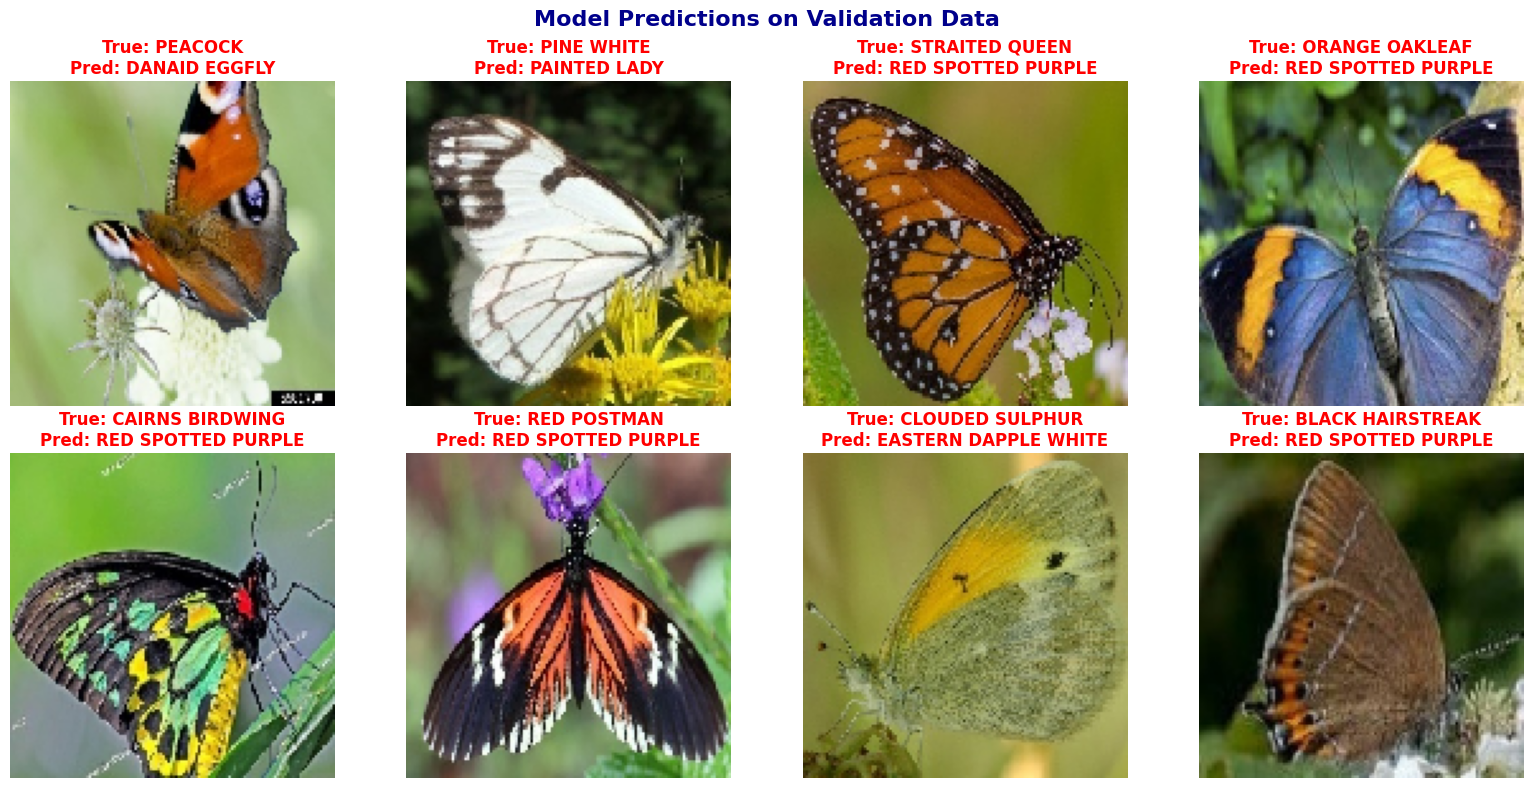

In [ ]:
display_predictions(val_images, true_labels, pred_labels, class_names, num_images=8)

In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3601 - loss: 2.6100 - val_accuracy: 0.1000 - val_loss: 4.1701
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 898ms/step - accuracy: 0.4840 - loss: 2.2316 - val_accuracy: 0.0250 - val_loss: 4.2327
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4963 - loss: 1.9282 - val_accuracy: 0.0750 - val_loss: 4.4125
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 978ms/step - accuracy: 0.5352 - loss: 1.7453 - val_accuracy: 0.1000 - val_loss: 4.3167
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6952 - loss: 1.2838 - val_accuracy: 0.0750 - val_loss: 4.3111
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 977ms/step - accuracy: 0.7516 - loss: 1.0807 - val_accuracy: 0.1250 - val_loss: 4.7085
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 969ms/step - accuracy: 0.7476 - loss: 0.9626 - val_accuracy: 0.0750 - val_loss: 4.5133
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7832 - loss: 0.8532 - val_accuracy: 0.1000 - val_loss: 4.5810
Epo

In [ ]:
train_acc = history.history['accuracy'][-1] * 100
print(f"Akurasi Training: {train_acc:.2f}%")

Akurasi Training: 85.62%


In [ ]:
val_acc = history.history['val_accuracy'][-1] * 100
print(f"Akurasi Validation: {val_acc:.2f}%")

Akurasi Validation: 7.50%


In [ ]:
train_df['label'].value_counts()

,count
label,
MOURNING CLOAK,131
SLEEPY ORANGE,107
ATALA,100
BROWN SIPROETA,99
CRECENT,97
...,...
AMERICAN SNOOT,74
GOLD BANDED,73
MALACHITE,73
